In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import cv2;
%matplotlib inline

# Stereo Matching Dynamic Programming

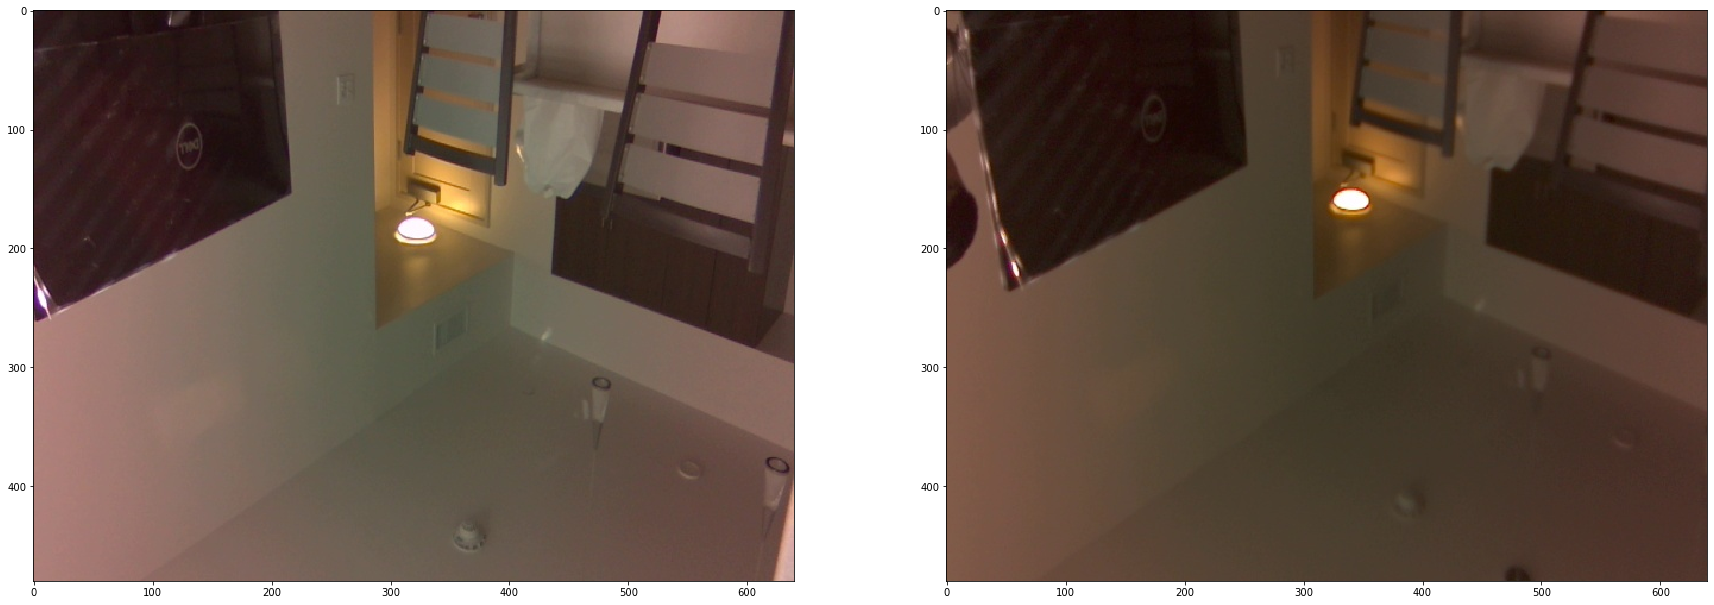

In [2]:
plt.figure(figsize=(30,30))
im1 = plt.imread('im1.jpg')
im2 = plt.imread('im2.jpg')
plt.subplot(1,2,1)
plt.imshow(im1)
plt.subplot(1,2,2)
plt.imshow(im2)
plt.show()

## Stereo Matching in 1D

In [29]:
def stereo_1d(scanlineL, scanlineR, c_occ):
    '''
        scanlineL: left scanlin for dynamic progarmming
        scanlineR: right Scanline for dynamic progarmming
        c_occ: occlusion cost in the maximum likelihood formulation
    '''
    l_shape = scanlineL.shape[0]
    r_shape = scanlineR.shape[0]
    
    C = np.zeros(shape=(l_shape,r_shape),dtype=float)
    M = C.copy()
    
    C[0,:] = np.arange(r_shape)*c_occ
    C[:,0] = np.arange(l_shape)*c_occ
    
    
    # forward pass of the dynamic progarmming appraoch.
    # this finds the minimum of the cost function
    for i in range(1, l_shape):
        for j in range(1, r_shape):
            costTL = C[i-1,j-1] + (scanlineL[i-1] - scanlineR[j-1])**2
            costL = C[i-1,j] + c_occ
            costT = C[i,j-1] + c_occ
            cmin = min(costT,costL,costTL)
            
            C[i,j] = cmin
            
            if cmin == costTL:
                M[i,j] = 1
            elif cmin == costL:
                M[i,j] = 2
            elif cmin == costT:
                M[i,j] = 3
    matches = []
    p = l_shape-1
    q = r_shape-1
    
    #this is the backward pass of the dynamic programming paradigm
    # this finds the argmin of the cost function (what we want)
    while (p!=0 and q!=0):
        if M[p,q] == 1:
            matches.append([p,q])
            p-=1
            q-=1
        elif M[p,q] == 2:
            p-=1
        else:
            q-=1
    return np.array(matches)

In [30]:
v1 = np.array([3,2,6,8,7,0,2,9,3,0,4])
v2 = np.array([3,2,0,6,8,2,0,0,9,0,3,4])
c_occ = 0.01

In [31]:
np.array(stereo_1d(v1,v2,c_occ))

array([[ 9, 11],
       [ 8,  9],
       [ 6,  8],
       [ 4,  5],
       [ 3,  4],
       [ 2,  2],
       [ 1,  1]])

In [88]:
def stereo_correspondence(im1,im2,c_occ=0.01):
    '''
        Description:
        -------------
            Uses the 1d stereo correspondence to find the 2d correspondence. 
            Just goes through each line and runs 1d stereo correspondence DP.
    '''
    corr_im1 = np.zeros(shape=im1.shape, dtype=float)
    corr_im2 = np.zeros(shape=im2.shape, dtype=float)
    for row in range(im1.shape[0]):
        print(row/im1.shape[0])
        row_corr = stereo_1d(im1[row,:], im2[row,:], c_occ)-1
        corr_im1[row,row_corr[:,0]] = 1
        corr_im2[row,row_corr[:,1]] = 1
    return corr_im1, corr_im2

In [89]:
grayim1 = np.mean(im1,axis=2) / 255
grayim2 = np.mean(im2,axis=2) / 255

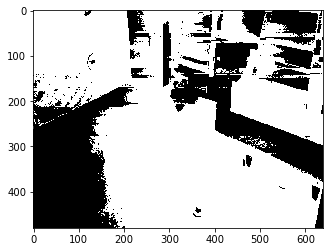

In [41]:
plt.imshow(c1,cmap='gray')

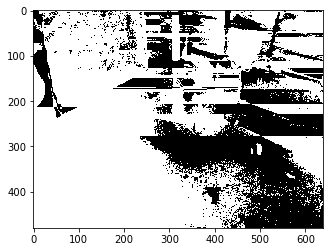

In [42]:
plt.imshow(c2,cmap='gray')